In [13]:
import numpy as np, pandas as pd
import os, sys
from pathlib import Path
import importlib.util
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import time

data_dir = os.path.abspath("")

spec = importlib.util.spec_from_file_location("utils", data_dir + '\\utils.py')
u = importlib.util.module_from_spec(spec)
spec.loader.exec_module(u)

In [2]:
#HIGGS_train_labels, HIGGS_valid_labels = u.get_HIGGS_labels()
SUSY_train_labels, SUSY_valid_labels = u.get_SUSY_labels()

In [71]:
print(len(HIGGS_train_labels), len(HIGGS_valid_labels))
print(len(SUSY_train_labels), len(SUSY_valid_labels))

10500000 500000
4500000 500000


In [11]:
HIGGS_DL_train_info = pd.read_csv(data_dir + "\\HIGGS\\DL info\\best_train_info.csv")
HIGGS_DL_valid_info = pd.read_csv(data_dir + "\\HIGGS\\DL info\\best_valid_info.csv")

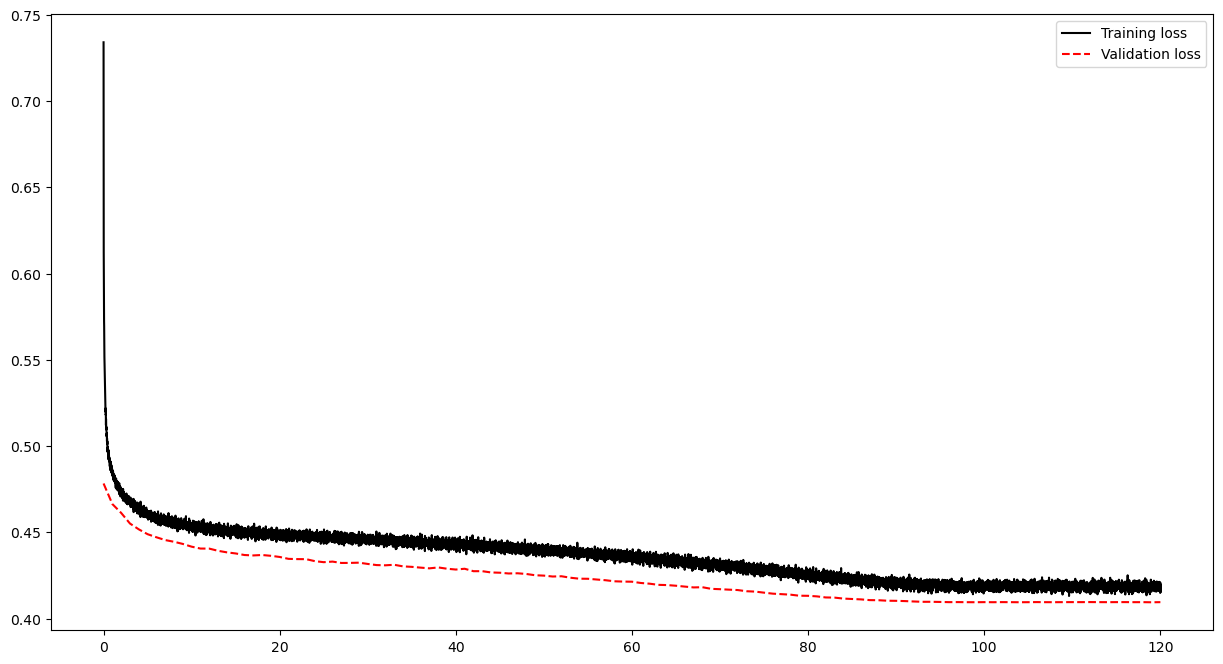

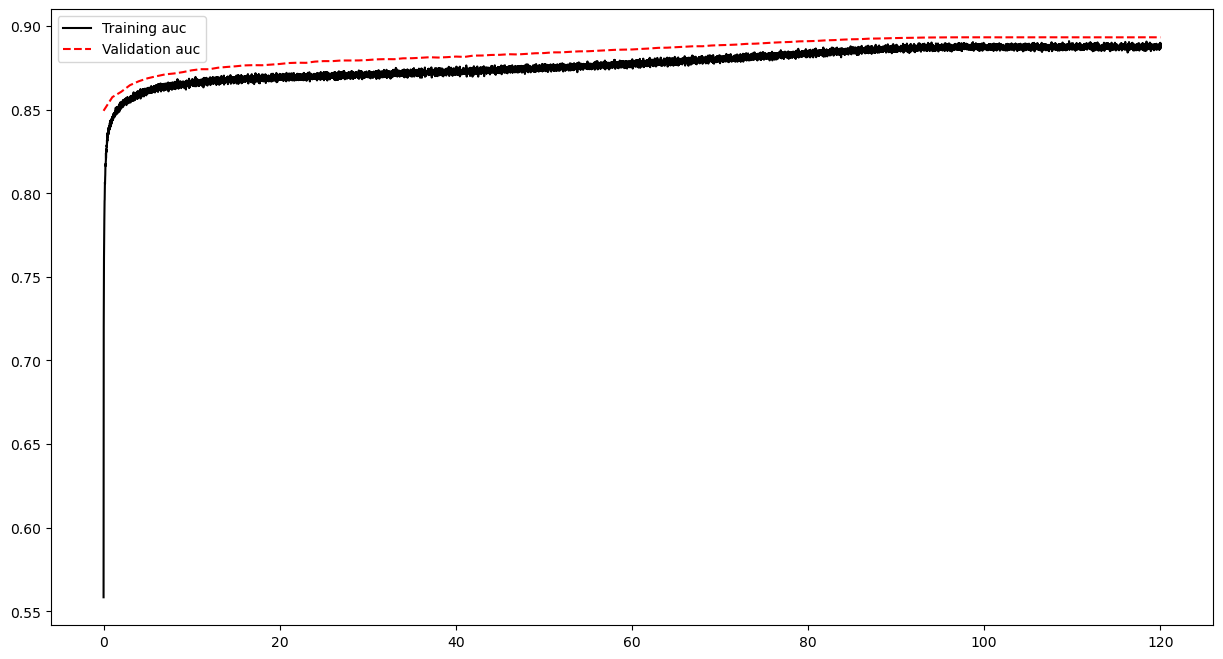

In [24]:
u.plot_training_info(HIGGS_DL_train_info, HIGGS_DL_valid_info, n=50)

In [7]:
HIGGS_DL_valid_pred = pd.read_csv(data_dir + "\\HIGGS\\predictions\\DL_prediction_best.csv")
HIGGS_DL_train_pred = pd.concat([pd.read_csv(data_dir + "\\HIGGS\\predictions\\DL_prediction_train_part1_best.csv"), 
                                 pd.read_csv(data_dir + "\\HIGGS\\predictions\\DL_prediction_train_part2_best.csv")], 
                               axis=0, ignore_index=True)

HIGGS_XGB_valid_pred = pd.read_csv(data_dir + "\\HIGGS\\predictions\\XGB_prediction_best.csv")
HIGGS_XGB_train_pred = pd.concat([pd.read_csv(data_dir + "\\HIGGS\\predictions\\XGB_prediction_train_part1_best.csv"), 
                                 pd.read_csv(data_dir + "\\HIGGS\\predictions\\XGB_prediction_train_part2_best.csv")], 
                               axis=0, ignore_index=True)

HIGGS_RFC_valid_pred = pd.read_csv(data_dir + "\\HIGGS\\predictions\\RFC_prediction_best.csv")
HIGGS_RFC_train_pred = pd.concat([pd.read_csv(data_dir + "\\HIGGS\\predictions\\RFC_prediction_train_part1_best.csv"), 
                                 pd.read_csv(data_dir + "\\HIGGS\\predictions\\RFC_prediction_train_part2_best.csv")], 
                               axis=0, ignore_index=True)

In [97]:
t = pd.read_csv(data_dir + "\\SUSY\\predictions\\XGB_prediction_best.csv")

print(round(roc_auc_score(SUSY_valid_labels, t), 6))

0.877811
0.87752
0.877681


In [3]:
name = "\\SUSY\\predictions\\RFC_prediction_best"
t0 = pd.read_csv(data_dir + "\\SUSY\\predictions\\RFC_prediction.csv")
t1 = pd.read_csv(data_dir + name + ".csv")
t2 = pd.read_csv(data_dir + name + "1.csv")

print(round(roc_auc_score(SUSY_valid_labels, t0), 6))
print(round(roc_auc_score(SUSY_valid_labels, t1), 6))
print(round(roc_auc_score(SUSY_valid_labels, t2), 6))

0.876292
0.876277
0.876305


In [83]:
t1.shape, t2.shape

((500000, 1), (1, 500000))

In [6]:
t0 = pd.read_csv(data_dir + "\\SUSY\\predictions\\DL_prediction.csv").T
t1 = pd.read_csv(data_dir + "\\SUSY\\predictions\\DL_prediction_best.csv").T

print(round(roc_auc_score(SUSY_valid_labels, t0), 6))
print(round(roc_auc_score(SUSY_valid_labels, t1), 6))

0.879809
0.879889


In [5]:
t0.T

,0
0,1.059211
1,-0.943937
2,-1.566394
3,1.429063
4,-1.692521
...,...
499995,2.479227
499996,0.126314
499997,-2.497195
499998,8.319640
